In [31]:
import cv2
import matplotlib.pyplot as plt

Pipeline
1. edge detection
2. make the colour uniform 
3. corner detection
4. create correspondences

Try step 1-3 with 1 image first

In [32]:
# PARAMS 
gaussian_blur_kernel_size = (5, 5)
gaussian_blur_sigma_x = 0

canny_threshold1 = 100 
canny_threshold2 = 200 

harris_block_size = 2 
harris_ksize = 3 
harris_k = 0.04

### Preprocess img

In [33]:
# img1_path = "data/colmap/fragment1/images/fragment1_001.png"
# img2_path = "data/colmap/fragment2/images/fragment2_011.png"

img1_path = "1.jpg"
img2_path = "2.jpg"

In [34]:
img1 = cv2.imread(img1_path)
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img1_blur = cv2.GaussianBlur(img1_gray, gaussian_blur_kernel_size, gaussian_blur_sigma_x)

img2 = cv2.imread(img2_path)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img2_blur = cv2.GaussianBlur(img2_gray, gaussian_blur_kernel_size, gaussian_blur_sigma_x)

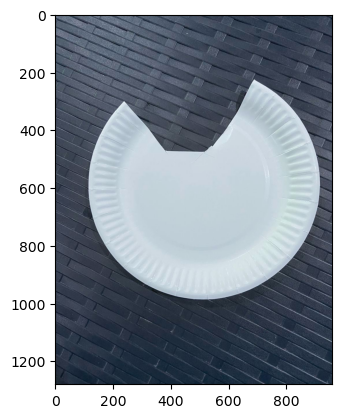

In [38]:
plt.imshow(img1)

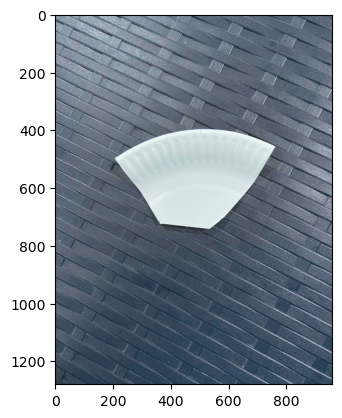

In [36]:
plt.imshow(img2)

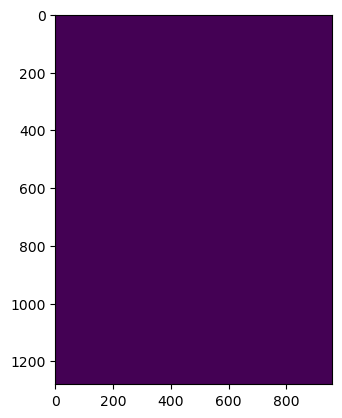

In [53]:
mask = cv2.inRange(img1_gray, 255, 0) # modify your thresholds
sky = cv2.bitwise_and(img1_gray, mask)
plt.imshow(sky)

In [52]:
img1_gray

array([[132, 106, 109, ...,  70,  71,  72],
       [120, 106, 118, ...,  71,  71,  71],
       [114, 110, 126, ...,  70,  71,  71],
       ...,
       [ 57,  52,  45, ...,  50,  51,  53],
       [ 49,  49,  49, ...,  56,  57,  58],
       [ 34,  42,  51, ...,  57,  63,  68]],
      shape=(1280, 960), dtype=uint8)

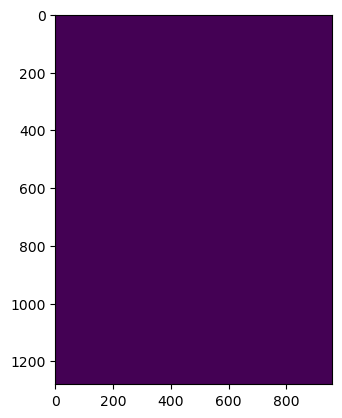

### Edge detection

In [13]:
edges_1 = cv2.Canny(image=img1_blur, threshold1=canny_threshold1, threshold2=canny_threshold2)
edges_2 = cv2.Canny(image=img2_blur, threshold1=canny_threshold1, threshold2=canny_threshold2)

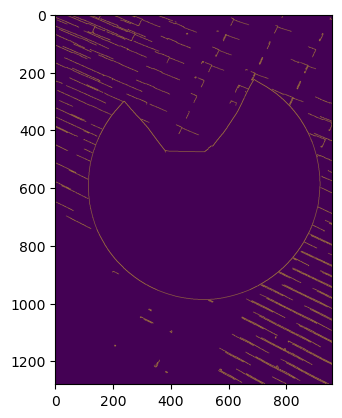

In [14]:
plt.imshow(edges_1)
plt.show()

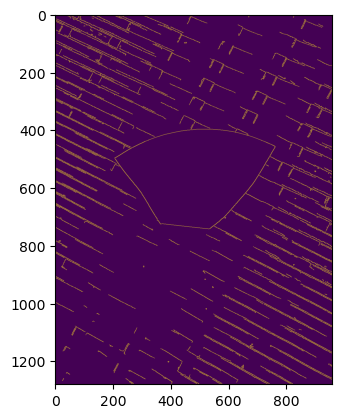

In [15]:
plt.imshow(edges_2)
plt.show()

### Feature matching

In [16]:
sift = cv2.SIFT_create()

In [17]:
kp1, des1 = sift.detectAndCompute(edges_1, None)
kp2, des2 = sift.detectAndCompute(edges_2, None)

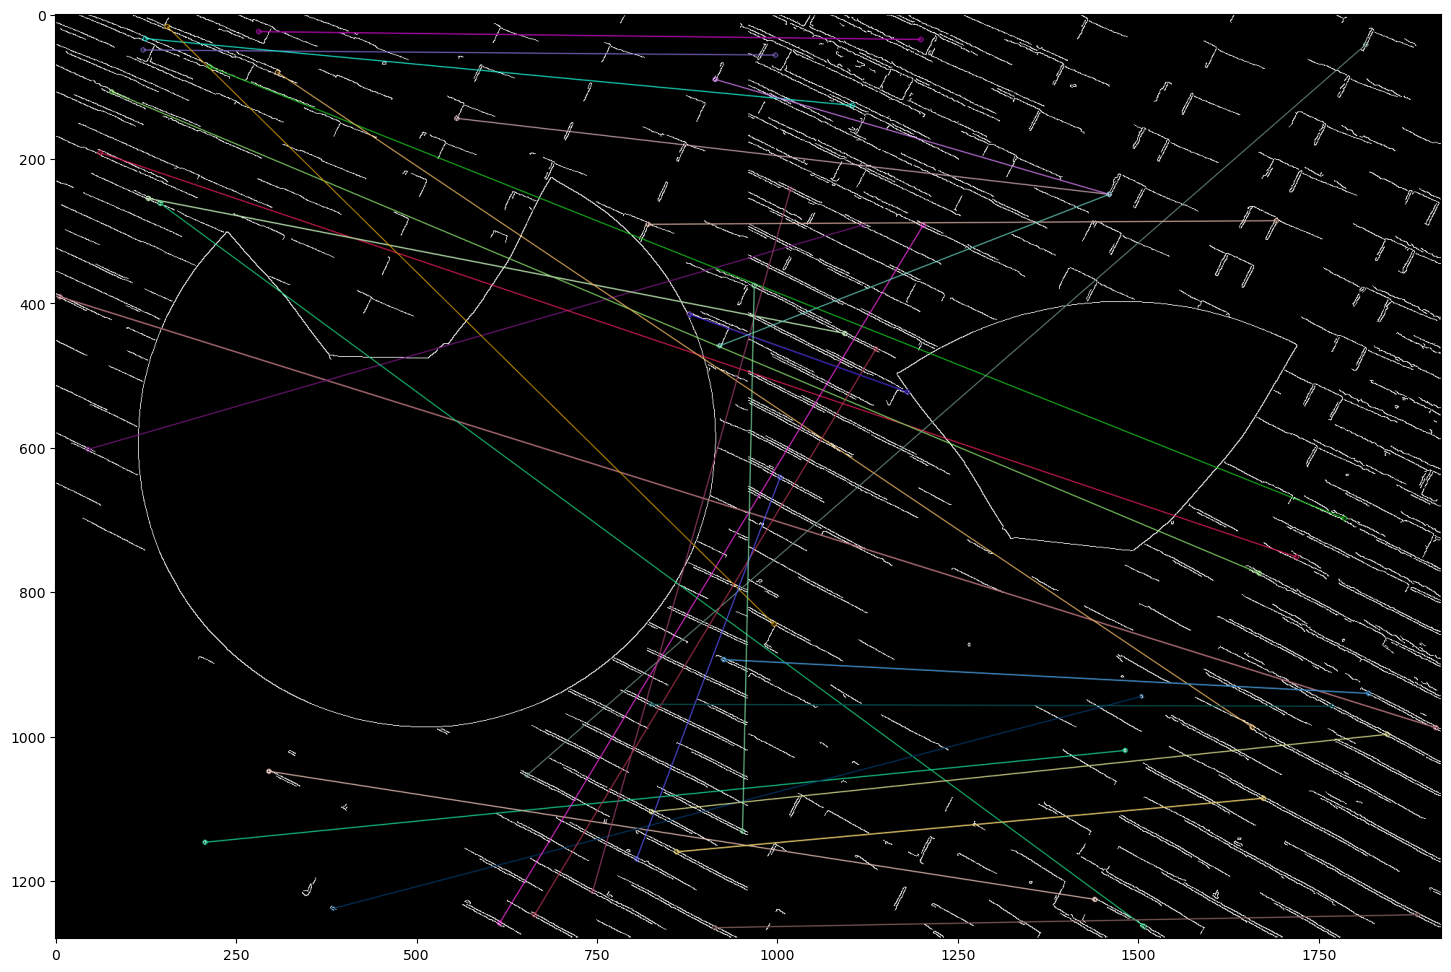

(<matplotlib.image.AxesImage at 0x7fa23eba0690>, None)

In [18]:
# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
 
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(edges_1,kp1,edges_2,kp2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
 
plt.figure(figsize=(20, 12))
plt.imshow(img3),plt.show()